In [21]:
import keras
import os,sys
import numpy as np
import pandas as pd
import random
# os.environ["CUDA_VISIBLE_DEVICES"]="0"
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, Dense, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
import PIL.Image as Image
import matplotlib.pyplot as plt
from tqdm import tqdm
Image.MAX_IMAGE_PIXELS = None

In [22]:
start_page = 1
end_page = 20
step = 2
width = 10
scale = 10
epochs = 30
train_abc = ['3',]
batch_size = 4096
threshhold = 0.8

In [23]:
def normalization(data):
    # 归一化
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range

def resize_img(input_dir):
    im = Image.open(input_dir)
    (x, y) = im.size  # 读取图片尺寸（像素）
    x_1 = x//scale  # 定义缩小后的标准宽度
    y_1 = int(y * x_1 / x)  # 计算缩小后的高度
    out = im.resize((x_1, y_1))  # 改变尺寸，保持图片高品质
    #判断图片的通道模式，若图片在RGBA模式下，需先将其转变为RGB模式
    if out.mode=='RGBA':
        #转化为rgb格式
        out=out.convert('RGB')
        #最后保存为jpg格式的图片，这里因为图片本身为jpg所以后缀不更改
    return out

def save_mini_img():
    for i_ in range(start_page, end_page, step):
        i_ = str(i_) if i_ >= 10 else '0' + str(i_)
        for k_ in ['test','train']:
            j_li = ['a','b'] if k_ == 'test' else train_abc
            for j_ in j_li:
                _PREFIX = f'/kaggle/input/vesuvius-challenge-ink-detection/{k_}/{j_}/surface_volume/'
                out = resize_img(_PREFIX + f"{i_}.tif")
                save_dir = f'{k_}/{j_}/'
                if not os.path.exists(save_dir):
                    os.makedirs(save_dir)
                out.save(save_dir + f'{k_}_{j_}_{i_}.tif')
                
def save_mini_img_2():
    for k_ in ['test','train']:
        print('k_',k_)
        j_li = ['a','b'] if k_ == 'test' else train_abc
        for j_ in j_li:
            _PREFIX = f'/kaggle/input/vesuvius-challenge-ink-detection/{k_}/{j_}/'
            out = resize_img(_PREFIX + f"mask.png")
            save_dir = f'{k_}/{j_}/'
            if not os.path.exists(save_dir):
                os.makedirs(save_dir)
            out.save(save_dir + f'{k_}_{j_}_mask.png')
        
        if k_ == 'train':
            for j_ in j_li:
                _PREFIX = f'/kaggle/input/vesuvius-challenge-ink-detection/{k_}/{j_}/'
                print(_PREFIX + f"inklabels.png")
                out = resize_img(_PREFIX + f"inklabels.png")
                save_dir = f'{k_}/{j_}/'
                if not os.path.exists(save_dir):
                    os.makedirs(save_dir)
                out.save(save_dir + f'{k_}_{j_}_inklabels.png')

In [24]:
save_mini_img()
save_mini_img_2()
base_dir = '/kaggle/working/'
# base_dir = 'dataset/'

k_ test
k_ train
/kaggle/input/vesuvius-challenge-ink-detection/train/3/inklabels.png
/kaggle/input/vesuvius-challenge-ink-detection/train/2/inklabels.png


In [25]:
train_label_li = []
train_mask_li = []
train_tif_li = []
for num_ in train_abc:
    train_label_img = Image.open(base_dir + f'train/{num_}/train_{num_}_inklabels.png')
    train_label = np.array(train_label_img)
    print(train_label.shape)
    train_mask_img = Image.open(base_dir + f'train/{num_}/train_{num_}_mask.png')
    train_mask = np.array(train_mask_img)
    print(train_mask.shape)

    _train_tif_list = []
    for i_ in range(start_page, end_page, step):
        i_ = str(i_) if i_ >= 10 else '0' + str(i_)
        _tif = Image.open(base_dir + f'train/{num_}/train_{num_}_{i_}.tif')
        _tif= np.array(_tif).astype(int) 
        
        print(num_,i_, '_tif.sum()',_tif.sum(),_tif.sum()/train_mask.sum())
        _train_tif_list.append(_tif)

    __train_tif_list = []
    for n_ in range(len(_train_tif_list)):
        if n_>0:
            __train_tif_list.append(_train_tif_list[n_-1] - _train_tif_list[n_])
    _train_tif = np.stack(__train_tif_list,axis=2)
    
    del _train_tif_list
    del __train_tif_list
    train_tif = _train_tif/65535
#     train_tif = train_tif.reshape(train_tif.shape+(1,))
    print(train_tif.shape)
    
    train_label_li.append(train_label)
    train_mask_li.append(train_mask)
    train_tif_li.append(train_tif)

(759, 524)
(759, 524)
3 01 _tif.sum() 6748110017 27022.380865999527
3 03 _tif.sum() 6759243408 27066.963827921336
3 05 _tif.sum() 6763577852 27084.32083548572
3 07 _tif.sum() 6764524472 27088.111515559238
3 09 _tif.sum() 6762365076 27079.464350500355
3 11 _tif.sum() 6754650175 27048.570516131873
3 13 _tif.sum() 6745369482 27011.406566475656
3 15 _tif.sum() 6749366279 27027.411487928624
3 17 _tif.sum() 6785351756 27171.513060471003
3 19 _tif.sum() 6874708921 27529.338190715313
(759, 524, 9)
(1482, 950)
(1482, 950)
2 01 _tif.sum() 25196375199 25744.86964682562
2 03 _tif.sum() 25216605705 25765.54054633977
2 05 _tif.sum() 25254001873 25803.750783441214
2 07 _tif.sum() 25303657654 25854.487510409268
2 09 _tif.sum() 25374243663 25926.61009098851
2 11 _tif.sum() 25475506769 26030.077571664307
2 13 _tif.sum() 25610736182 26168.250764538494
2 15 _tif.sum() 25786859516 26348.20808934346
2 17 _tif.sum() 26008111858 26574.276825773097
2 19 _tif.sum() 26260609168 26832.27069516039
(1482, 950, 9)


In [26]:
"""
(818, 633)
(818, 633)
1 10 _tif.sum() 7137888197 24493.137823240366
1 11 _tif.sum() 7154795847 24551.15517939497
1 12 _tif.sum() 7175508201 24622.228097205447
1 13 _tif.sum() 7196143069 24693.035127511805
1 14 _tif.sum() 7216431005 24762.65168620292
1 15 _tif.sum() 7236825847 24832.635084962116
1 16 _tif.sum() 7259026872 24908.81626770616
1 17 _tif.sum() 7286648963 25003.59943930493
1 18 _tif.sum() 7321406740 25122.86819205007
1 19 _tif.sum() 7367072673 25279.56747899967
1 20 _tif.sum() 7428671463 25490.939191693204
1 21 _tif.sum() 7514987735 25787.127124052928
1 22 _tif.sum() 7632283359 26189.618421955638
1 23 _tif.sum() 7783098042 26707.127902986715
1 24 _tif.sum() 7962839754 27323.89835428791
1 25 _tif.sum() 8157600930 27992.20699050181
1 26 _tif.sum() 8341913588 28624.66230646755
1 27 _tif.sum() 8474576053 29079.883787882947
1 28 _tif.sum() 8508918739 29197.728186422533
1 29 _tif.sum() 8394692614 28805.769648347425
1 30 _tif.sum() 8107296522 27819.59111809597
1 31 _tif.sum() 7659724053 26283.779143104206
1 32 _tif.sum() 7113837085 24410.608203167892
1 33 _tif.sum() 6568779956 22540.284794663447
1 34 _tif.sum() 6118965411 20996.77930094982
1 35 _tif.sum() 5824248971 19985.481535494673
1 36 _tif.sum() 5695571775 19543.935211238608
1 37 _tif.sum() 5704851541 19575.778045047766
1 38 _tif.sum() 5803903644 19915.668043812453
1 39 _tif.sum() 5946530414 20405.081304216536
(818, 633, 29)
"""

'\n(818, 633)\n(818, 633)\n1 10 _tif.sum() 7137888197 24493.137823240366\n1 11 _tif.sum() 7154795847 24551.15517939497\n1 12 _tif.sum() 7175508201 24622.228097205447\n1 13 _tif.sum() 7196143069 24693.035127511805\n1 14 _tif.sum() 7216431005 24762.65168620292\n1 15 _tif.sum() 7236825847 24832.635084962116\n1 16 _tif.sum() 7259026872 24908.81626770616\n1 17 _tif.sum() 7286648963 25003.59943930493\n1 18 _tif.sum() 7321406740 25122.86819205007\n1 19 _tif.sum() 7367072673 25279.56747899967\n1 20 _tif.sum() 7428671463 25490.939191693204\n1 21 _tif.sum() 7514987735 25787.127124052928\n1 22 _tif.sum() 7632283359 26189.618421955638\n1 23 _tif.sum() 7783098042 26707.127902986715\n1 24 _tif.sum() 7962839754 27323.89835428791\n1 25 _tif.sum() 8157600930 27992.20699050181\n1 26 _tif.sum() 8341913588 28624.66230646755\n1 27 _tif.sum() 8474576053 29079.883787882947\n1 28 _tif.sum() 8508918739 29197.728186422533\n1 29 _tif.sum() 8394692614 28805.769648347425\n1 30 _tif.sum() 8107296522 27819.591118095

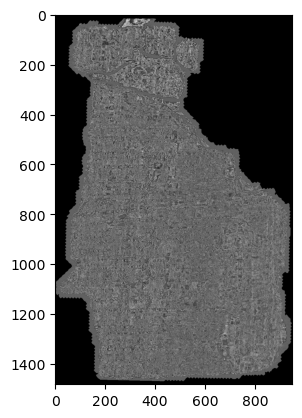

In [27]:
plt.imshow(_tif,cmap='gray')

In [28]:
def get_window_piece(tif,x,y):
    return tif[x-width:x+width+1,y-width:y+width+1]

def print_score(y_pre, y_true):
    score =  (y_pre.argmax(axis=1) == y_true.argmax(axis=1)).sum() / y_true.shape[0]
    print(score)
    return score

def show_pre_img(np_mask, pre_data):
    pre_data = pre_data[:,1]
    x_,y_ = np_mask.shape
    len_pre_data = len(pre_data)
    pre_img = np.zeros((x_,y_))
    print(pre_img.shape)
    X_test = []
    Y_test = []
    n_ = 0
    for x in range(width, x_-width):
        for y in range(width,y_-width):
            if np_mask[x,y] > 0 and n_<len_pre_data:
                pre_img[x,y] = 1 if pre_data[n_] > threshhold else 0
                n_ += 1
            else:
                pre_img[x,y] = 0
    plt.figure()
    plt.imshow(pre_img,cmap='gray')
    return pre_img
    
def pre_img_to_submission(pre_img):
    x,y = pre_img.shape
    _pre_img = Image.fromarray(pre_img).resize((scale*y,scale*x), Image.BOX)
    _pre_img = np.array(_pre_img)
    pixels = _pre_img.reshape(-1)
    pixels[0] = 0
    pixels[-1] = 0
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 2
    runs[1::2] = runs[1::2] - runs[:-1:2]
    resp = ' '.join(str(x) for x in runs)

    return resp.strip()

In [29]:
def Gen_X(np_mask, np_tif):
    x_,y_ = np_mask.shape
    
    n,X_li = 0,[]
    _batch_size = 256
    for x in range(width, x_-width):
        for y in range(width,y_-width):
            if np_mask[x,y] > 0:
                n+=1
                X = get_window_piece(np_tif, x,y)
                X = np.array(X)
                
                X_li.append(X)
                if n > _batch_size -1:
                    yield np.stack(X_li)
                    n,X_li = 0,[]
                    
                
def Gen_X_Y(np_mask_li, np_tif_li, np_label_li):
    n,X_li,Y_li = 0,[],[]
    
    while True:
        num_ = random.choice(range(len(np_mask_li)))
        np_mask = np_mask_li[num_]
        np_tif = np_tif_li[num_]
        np_label = np_label_li[num_]
        x_,y_ = np_mask.shape
        x = random.choice(range(width, x_-width))
        y= random.choice(range(width, y_-width))
        if np_mask[x,y] > 0:
            n+=1
            X = np.array(np_tif[x-width:x+width+1,y-width:y+width+1])
            Y = to_categorical(np_label[x,y], num_classes=2)
            X_li.append(X)
            Y_li.append(Y)
            if n > batch_size -1:
                yield np.stack(X_li), np.stack(Y_li)
                n,X_li,Y_li = 0,[],[]
                
gen_x_y = Gen_X_Y(train_mask_li,train_tif_li,train_label_li)

In [30]:
train_shape = next(gen_x_y)[0].shape
train_shape

(4096, 21, 21, 9)

In [31]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu', input_shape=(width*2+1,width*2+1,train_shape[-1])))
model.add(MaxPooling2D())
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(padding='same'))
model.add(Flatten())
# model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [34]:
steps_per_epoch = sum([i.sum() for i in train_mask_li])
model.fit(gen_x_y, epochs=epochs, steps_per_epoch=steps_per_epoch/batch_size//2)

# model.fit(gen_x_y, epochs=epochs, steps_per_epoch=100)

Epoch 1/30
149/149 [==============================] - 39s 262ms/step - loss: 0.1399 - accuracy: 0.9438
Epoch 2/30
149/149 [==============================] - 38s 258ms/step - loss: 0.1287 - accuracy: 0.9488
Epoch 3/30
149/149 [==============================] - 39s 259ms/step - loss: 0.1216 - accuracy: 0.9522
Epoch 4/30
149/149 [==============================] - 39s 259ms/step - loss: 0.1169 - accuracy: 0.9542
Epoch 5/30
149/149 [==============================] - 38s 258ms/step - loss: 0.1079 - accuracy: 0.9581
Epoch 6/30
149/149 [==============================] - 39s 259ms/step - loss: 0.1162 - accuracy: 0.9540
Epoch 7/30
149/149 [==============================] - 38s 258ms/step - loss: 0.1005 - accuracy: 0.9610
Epoch 8/30
149/149 [==============================] - 38s 258ms/step - loss: 0.0977 - accuracy: 0.9623
Epoch 9/30
149/149 [==============================] - 39s 259ms/step - loss: 0.0895 - accuracy: 0.9659
Epoch 10/30
149/149 [==============================] - 39s 262ms/step - l

KeyboardInterrupt: 

(272, 633, 9)
(272, 633)
403/403 [==============================] - 3s 8ms/step
(272, 633)
(545, 633, 9)
(545, 633)
700/700 [==============================] - 6s 8ms/step
(545, 633)


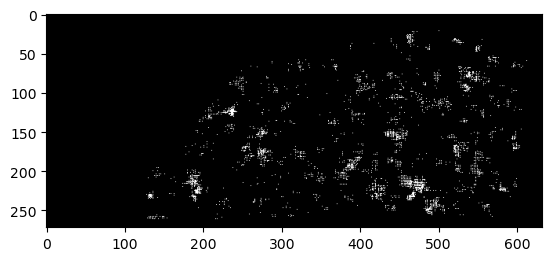

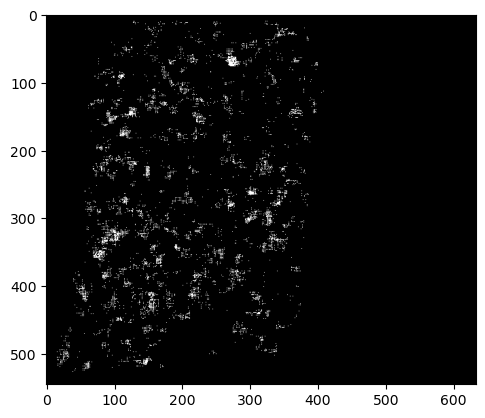

In [35]:
pre_imgs = {}
for c_ in ['a','b']:
    test_mask_img = Image.open(base_dir + f'test/{c_}/test_{c_}_mask.png')
    test_mask = np.array(test_mask_img)
    
    _test_tif_list = []
    for i_ in range(start_page, end_page, step):
        i_ = str(i_) if i_ >= 10 else '0' + str(i_)
        _tif = Image.open(base_dir + f'test/{c_}/test_{c_}_{i_}.tif')
        _tif = np.array(_tif).astype(int)
       
        _test_tif_list.append(_tif)
     
    __test_tif_list = []
    for n_ in range(len(_test_tif_list)):
        if n_>0:
            __test_tif_list.append(_test_tif_list[n_-1] - _test_tif_list[n_])
    test_tif = np.stack(__test_tif_list,axis=2)
    
    del _test_tif_list   
    del __test_tif_list  
    test_tif= test_tif/65535
#     test_tif = test_tif.reshape(test_tif.shape+(1,))
    print(test_tif.shape)
    print(test_mask.shape)
    
    gen_x = Gen_X(test_mask, test_tif)
    
    pre = model.predict(gen_x)
    pre_imgs[c_] = show_pre_img(test_mask, pre)

In [ ]:
gen_x = Gen_X(test_mask,test_tif)
next(gen_x).shape

(545, 633)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

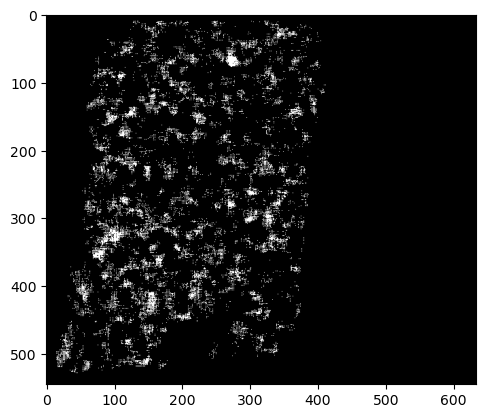

In [36]:
threshhold = 0.1
show_pre_img(test_mask, pre)

(545, 633)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

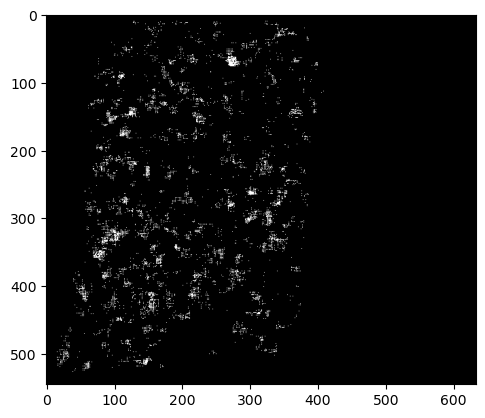

In [37]:
threshhold = 0.8
show_pre_img(test_mask, pre)

In [ ]:
subm = ''
for c_ in ['a','b']:
    _tmp = pre_img_to_submission(pre_imgs[c_])
    subm = subm + f'{c_},' + _tmp + '\n'
subm = 'Id,Predicted\n' + subm

In [ ]:
print(subm.strip(), file=open('submission.csv', 'w'))